<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise/blob/main/GQtest_groupwise_(y_hat)_0_1_0_9_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise/groupwise_0.1_0.9'

In [4]:
os.listdir(base_path)

['data_groupwise_0.1_0.9_n20.csv',
 'data_groupwise_0.1_0.9_n30.csv',
 'data_groupwise_0.1_0.9_n60.csv',
 'data_groupwise_0.1_0.9_n120.csv',
 'data_groupwise_0.1_0.9_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.1_0.9_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,84.154272,79.239036,32.366047,0.300123,206.059477,205.908829,0.150648
1,0.0,1.0,86.147481,52.666501,98.148828,0.257951,247.220761,246.846781,0.373980
2,0.0,2.0,41.308105,88.279461,82.604398,-0.795970,221.395994,222.202889,-0.806895
3,0.0,3.0,92.798209,83.699854,31.357337,-0.564210,217.291191,218.032178,-0.740986
4,0.0,4.0,98.982709,93.850613,97.231883,-0.350520,299.714685,300.114561,-0.399875
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,25.505427,44.264832,86.727340,-0.348481,166.149118,166.629575,-0.480457
59996,999.0,56.0,25.774929,95.393020,60.374881,1.002727,192.545558,192.081302,0.464255
59997,999.0,57.0,55.205478,37.994521,78.005719,-0.922139,180.283579,181.033470,-0.749890
59998,999.0,58.0,53.560131,49.779453,69.181319,2.154825,184.675729,182.466509,2.209220


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,84.154272,79.239036,32.366047,0.300123,206.059477,205.908829,0.150648
1,0.0,1.0,86.147481,52.666501,98.148828,0.257951,247.220761,246.846781,0.373980
2,0.0,2.0,41.308105,88.279461,82.604398,-0.795970,221.395994,222.202889,-0.806895
3,0.0,3.0,92.798209,83.699854,31.357337,-0.564210,217.291191,218.032178,-0.740986
4,0.0,4.0,98.982709,93.850613,97.231883,-0.350520,299.714685,300.114561,-0.399875
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,25.505427,44.264832,86.727340,-0.348481,166.149118,166.629575,-0.480457
59996,999.0,56.0,25.774929,95.393020,60.374881,1.002727,192.545558,192.081302,0.464255
59997,999.0,57.0,55.205478,37.994521,78.005719,-0.922139,180.283579,181.033470,-0.749890
59998,999.0,58.0,53.560131,49.779453,69.181319,2.154825,184.675729,182.466509,2.209220


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    84.154272  79.239036  32.366047  ...  206.059477  205.908829  0.150648
      1.0    86.147481  52.666501  98.148828  ...  247.220761  246.846781  0.373980
      2.0    41.308105  88.279461  82.604398  ...  221.395994  222.202889 -0.806895
      3.0    92.798209  83.699854  31.357337  ...  217.291191  218.032178 -0.740986
      4.0    98.982709  93.850613  97.231883  ...  299.714685  300.114561 -0.399875
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   25.505427  44.264832  86.727340  ...  166.149118  166.629575 -0.480457
      56.0   25.774929  95.393020  60.374881  ...  192.545558  192.081302  0.464255
      57.0   55.205478  37.994521  78.005719  ...  180.283579  181.033470 -0.749890
      58.0   53.560131  49.779453  69.181319  ...  184.675729  182.466509  2.209220
      59.0   23.624446  90.317886  83.343565  ...  208.668181  207.748006  0.920176

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    84.154272  79.239036  32.366047  ...  206.059477  205.908829  0.150648
      1.0    86.147481  52.666501  98.148828  ...  247.220761  246.846781  0.373980
      2.0    41.308105  88.279461  82.604398  ...  221.395994  222.202889 -0.806895
      3.0    92.798209  83.699854  31.357337  ...  217.291191  218.032178 -0.740986
      4.0    98.982709  93.850613  97.231883  ...  299.714685  300.114561 -0.399875
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   25.505427  44.264832  86.727340  ...  166.149118  166.629575 -0.480457
      56.0   25.774929  95.393020  60.374881  ...  192.545558  192.081302  0.464255
      57.0   55.205478  37.994521  78.005719  ...  180.283579  181.033470 -0.749890
      58.0   53.560131  49.779453  69.181319  ...  184.675729  182.466509  2.209220
      59.0   23.624446  90.317886  83.343565  ...  208.668181  207.748006  0.920176

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,84.154272,79.239036,32.366047,0.300123,206.059477,205.908829,0.150648
1,0.0,1.0,86.147481,52.666501,98.148828,0.257951,247.220761,246.846781,0.373980
2,0.0,2.0,41.308105,88.279461,82.604398,-0.795970,221.395994,222.202889,-0.806895
3,0.0,3.0,92.798209,83.699854,31.357337,-0.564210,217.291191,218.032178,-0.740986
4,0.0,4.0,98.982709,93.850613,97.231883,-0.350520,299.714685,300.114561,-0.399875
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,25.505427,44.264832,86.727340,-0.348481,166.149118,166.629575,-0.480457
59996,999.0,56.0,25.774929,95.393020,60.374881,1.002727,192.545558,192.081302,0.464255
59997,999.0,57.0,55.205478,37.994521,78.005719,-0.922139,180.283579,181.033470,-0.749890
59998,999.0,58.0,53.560131,49.779453,69.181319,2.154825,184.675729,182.466509,2.209220


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    84.154272  79.239036  32.366047  ...  206.059477  205.908829  0.150648
      1.0    86.147481  52.666501  98.148828  ...  247.220761  246.846781  0.373980
      2.0    41.308105  88.279461  82.604398  ...  221.395994  222.202889 -0.806895
      3.0    92.798209  83.699854  31.357337  ...  217.291191  218.032178 -0.740986
      4.0    98.982709  93.850613  97.231883  ...  299.714685  300.114561 -0.399875
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   25.505427  44.264832  86.727340  ...  166.149118  166.629575 -0.480457
      56.0   25.774929  95.393020  60.374881  ...  192.545558  192.081302  0.464255
      57.0   55.205478  37.994521  78.005719  ...  180.283579  181.033470 -0.749890
      58.0   53.560131  49.779453  69.181319  ...  184.675729  182.466509  2.209220
      59.0   23.624446  90.317886  83.343565  ...  208.668181  207.748006  0.920176

[60000 rows x 7 columns]

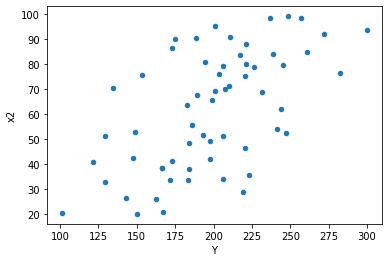

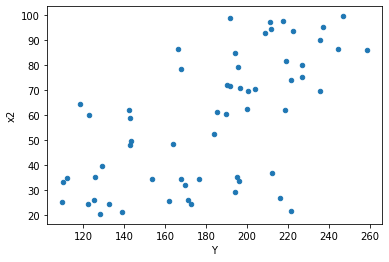

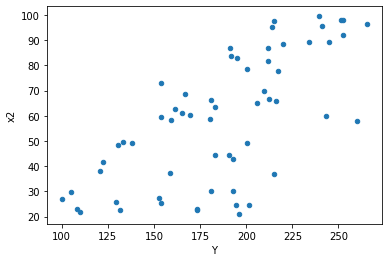

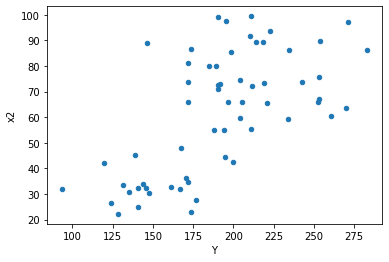

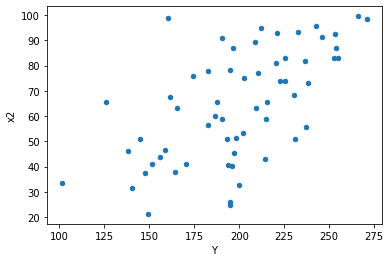

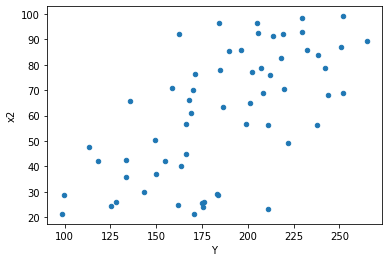

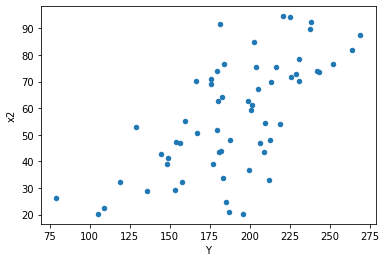

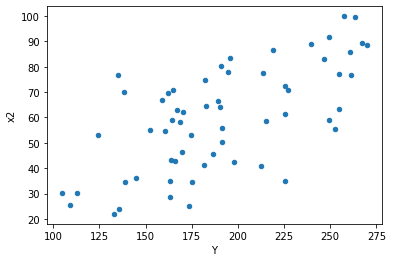

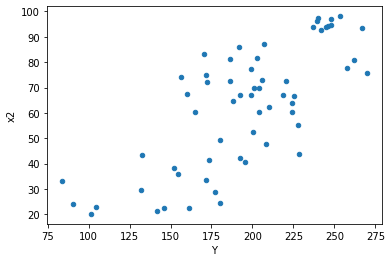

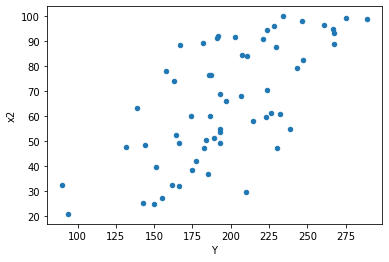

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='Y', y='x2', kind = 'scatter')
tablenew1.plot(x ='Y', y='x2', kind = 'scatter')
tablenew2.plot(x ='Y', y='x2', kind = 'scatter')
tablenew3.plot(x ='Y', y='x2', kind = 'scatter')
tablenew4.plot(x ='Y', y='x2', kind = 'scatter')
tablenew5.plot(x ='Y', y='x2', kind = 'scatter')
tablenew6.plot(x ='Y', y='x2', kind = 'scatter')
tablenew7.plot(x ='Y', y='x2', kind = 'scatter')
tablenew8.plot(x ='Y', y='x2', kind = 'scatter')
tablenew9.plot(x ='Y', y='x2', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,21.0,21.0,8.444817968291744,11.727471040224096,0.4021341889662735,0.5584510019154332,1.388718038003652,0.45816335253955454,0.7709183237302227,0.22908167626977727,Reject001=1 : Homoscedasticity
2.0,21.0,21.0,9.002625622858664,11.039332908034,0.428696458231365,0.5256825194301905,1.2262348086544785,0.644524631155794,0.677737684422103,0.322262315577897,Reject001=1 : Homoscedasticity
3.0,21.0,21.0,7.042257833202002,12.20917544875454,0.3353456111048572,0.5813893070835495,1.7337018521520424,0.21562242359268646,0.8921887882036568,0.10781121179634323,Reject001=1 : Homoscedasticity
4.0,21.0,21.0,4.076141772679942,4.280127139945446,0.19410198917523533,0.20381557809264028,1.0500437371027431,0.911966282058593,0.5440168589707035,0.4559831410292965,Reject001=1 : Homoscedasticity
10.0,21.0,21.0,8.523086388926808,13.601877282555021,0.40586125661556227,0.6477084420264296,1.5958863564056536,0.29204595554848023,0.8539770222257599,0.14602297777424011,Reject001=1 : Homoscedasticity
11.0,21.0,21.0,5.992902186589958,6.622863359285485,0.2853762945995218,0.3153744456802612,1.105117879965597,0.8209968087822954,0.5895015956088523,0.4104984043911477,Reject001=1 : Homoscedasticity
12.0,21.0,21.0,10.570306965601631,19.03553518531175,0.5033479507429348,0.9064540564434167,1.8008498000349513,0.18596189002909003,0.907019054985455,0.09298094501454501,Reject001=1 : Homoscedasticity
14.0,21.0,21.0,6.209842361009411,18.375992626468573,0.2957067790956862,0.8750472679270749,2.959172158998502,0.01636950775980539,0.9918152461200973,0.008184753879902695,Reject001=1 : Homoscedasticity
20.0,21.0,21.0,7.3950463883443165,26.18596288576979,0.3521450661116341,1.2469506136080852,3.5410140127102827,0.005498253139202047,0.997250873430399,0.0027491265696010236,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,8.444817968291744,11.727471040224096,0.4021341889662735,0.5584510019154332,1.388718038003652,0.45816335253955454,Reject001=1 : Homoscedasticity
1.0,21.0,21.0,9.562428275757846,5.64783196309876,0.4553537274170403,0.26894437919517905,0.5906273804339888,0.23579959789094812,Reject001=1 : Homoscedasticity
2.0,21.0,21.0,9.002625622858664,11.039332908034,0.428696458231365,0.5256825194301905,1.2262348086544785,0.644524631155794,Reject001=1 : Homoscedasticity
3.0,21.0,21.0,7.042257833202002,12.20917544875454,0.3353456111048572,0.5813893070835495,1.7337018521520424,0.21562242359268646,Reject001=1 : Homoscedasticity
4.0,21.0,21.0,4.076141772679942,4.280127139945446,0.19410198917523533,0.20381557809264028,1.0500437371027431,0.911966282058593,Reject001=1 : Homoscedasticity
5.0,21.0,21.0,13.15181653367666,8.501527100968026,0.6262769777941267,0.4048346238556203,0.6464146666887375,0.3250834384846573,Reject001=1 : Homoscedasticity
6.0,21.0,21.0,8.036430412092326,5.876575647475771,0.38268716248058693,0.2798369355940843,0.7312420248961969,0.47938480461471455,Reject001=1 : Homoscedasticity
7.0,21.0,21.0,10.388727427058186,6.04282045799392,0.4947013060503898,0.2877533551425676,0.5816709024682812,0.2226335248200188,Reject001=1 : Homoscedasticity
8.0,21.0,21.0,13.141900287650087,4.379767180359606,0.6258047756023851,0.208560341921886,0.33326741829531525,0.015100501671082204,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      939
Reject001=0 : Heteroscedasticity     61
Name: Result_test, dtype: int64